In [5]:
# https://www.youtube.com/watch?v=wQ8BIBpya2k
# pip install h5py


import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import TensorBoard
import h5py
import pickle
import time

NAME = "Number_classify-{}".format(int(time.time()))
tensorboard = TensorBoard(log_dir = 'logs/{}'.format(NAME))

gpu_options = tf.GPUOptions(per_process_gpu_memory_fraction = 1)
sess = tf.Session(config=tf.ConfigProto(gpu_options=gpu_options))

mnist = tf.keras.datasets.mnist  # 28x28 images of hand-written digits 0-9

(x_train, y_train), (x_test, y_test) = mnist.load_data()

print((x_train[1].shape))

x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test = tf.keras.utils.normalize(x_test, axis=1)

# print((x_train[1]))

InternalError: Failed to create session.

In [6]:

model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=(28, 28))) #1x784
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax)) #softmax:probability distrbution

model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

model.summary()
# model.fit(x_train, y_train, epochs=3, validation_split=0.1, callbacks=[tensorboard])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1290      
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
_________________________________________________________________


In [2]:
val_loss, val_acc = model.evaluate(x_test, y_test)
print(val_loss, val_acc)

10000/10000 [==============================] - 0s 46us/step
0.0855950718421489 0.9742


In [3]:
# import matplotlib.pyplot as plt

# plt.imshow(x_train[0], cmap = plt.cm.binary)
# plt.show()

In [5]:
# model.save('epic_num_reader.model')

In [18]:
new_model = tf.keras.models.load_model('epic_num_reader.model')

In [20]:
predictions = new_model.predict([x_test]) #predictions always a list

<class 'numpy.ndarray'>
(28, 28)
7


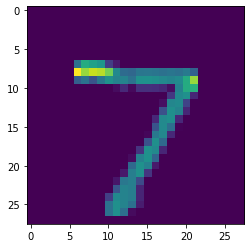

2


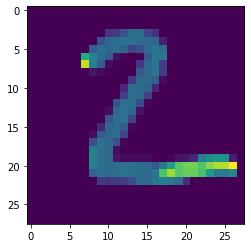

1


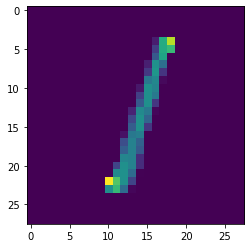

0


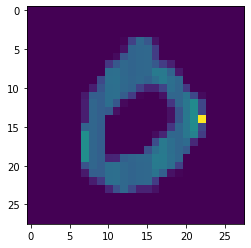

4


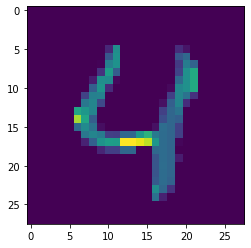

1


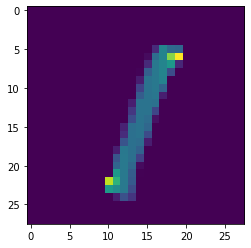

4


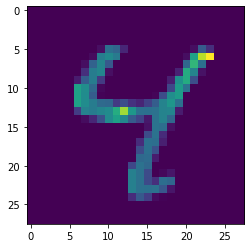

9


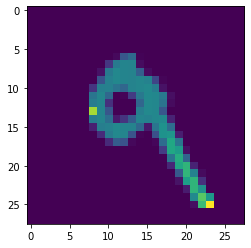

5


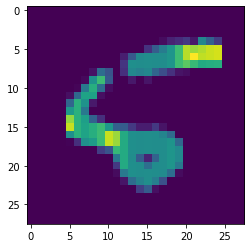

9


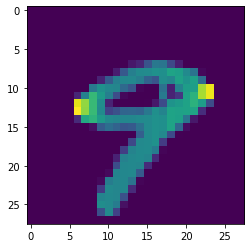

In [22]:
import numpy as np
import matplotlib.pyplot as plt

print(type(x_test[0]))
print(x_test[0].shape)


for i in range(0,10):
    print(np.argmax(predictions[i]))
    plt.imshow(x_test[i])
    plt.show()